In [1]:
import sys
sys.path.append('../code')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial import Polynomial
import xarray as xr
import xesmf as xe

import SeaLevelContrib as slc

import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [2]:
fn = '/Users/sbult/Desktop/Scripts/data/altimetry/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1M-m_1680178434259.nc'
ds = xr.open_dataset(fn)
ds2 = ds.groupby('time.year').mean('time')

In [3]:
lats = np.arange(30,71,1)
lons = np.arange(-20,21,1)
tg_id = np.zeros((len(lats),len(lons),2))

for i in range(len(lats)):
    for j in range(len(lons)):
        tg_id[i,j,:] = lats[i], lons[j]

tg_id = np.reshape(tg_id,[1681,2])

In [11]:
ds_out = xr.Dataset({
        "latitude": (["latitude"], np.arange(30, 70, 1.0), {"units": "degrees_north"}),
        "longitude": (["longitude"], np.arange(-20, 20, 1.0), {"units": "degrees_east"}),})
#regridder = xe.Regridder(ds2, ds_out, "conservative")
#dr = ds2['sla']*100
#dr_out = regridder(dr, keep_attrs=True)

#ds3 = dr_out.sel(latitude=60,longitude=-11,method='nearest')
#ds3 = ds3.to_dataframe()
#print(ds3)
#ds3.to_csv('/Users/sbult/Desktop/Scripts/data/altimetry/altimetry_lat60_lon-11.csv')

#lat = dr_out.latitude

In [6]:
fn = '/Users/sbult/Desktop/Scripts/data/altimetry/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1M-m_1680178434259.nc'
ds = xr.open_dataset(fn)
ds2 = ds.groupby('time.year').mean('time')

sla = ds2['sla'][7,:,:]
lat = ds2['latitude'][:]
lon = ds2['longitude'][:]
time = ds2['year']

In [8]:
bed = xr.open_dataset('/Users/sbult/Desktop/Scripts/data/StericDataSterre/ETOPO_2022_v1_60s_N90W180_bed.nc')

top = bed.z
min_lat = 30
max_lat = 71
min_lon = -20
max_lon = 20
top = top.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))

print(top)

<xarray.DataArray 'z' (lat: 2460, lon: 2400)>
[5904000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 30.01 30.02 30.04 30.06 ... 70.94 70.96 70.97 70.99
  * lon      (lon) float64 -19.99 -19.97 -19.96 -19.94 ... 19.96 19.97 19.99
Attributes:
    long_name:      z
    grid_mapping:   crs
    units:          meters
    positive:       up
    standard_name:  height
    vert_crs_name:  EGM2008
    vert_crs_epsg:  EPSG:3855


In [12]:
regridder = xe.Regridder(bed, ds_out, "conservative")
dr = bed.z
dr_out = regridder(dr, keep_attrs=True)

/opt/anaconda3/envs/nodaltide/lib/python3.9/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


In [9]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lon, lat, bed.z, 60, transform=ccrs.PlateCarree(),alpha=0.1)

ax.coastlines(color='grey',zorder=0)

regions = ['Cascais','Brest','Newlyn','Vlissingen','Hoek van Holland','IJmuiden','Den Helder','Harlingen','Delfzijl','Cuxhaven','Esbjerg','North Shields','Stavanger','Bergen']

lats2 = [38.683333,48.382850,50.103000,51.442222,51.977500,52.462222,52.964444,53.18,53.326389,53.866667,55.460833,55.007444,58.974339,60.398046]
lons2 = [-9.416667,-4.494838,-5.542833,3.596111,4.12000,4.554722,4.745000,5.409,6.933056,8.716667,8.441111,-1.439778,5.730121,5.320487]

outline_x = np.array([-12.5,-10.5,-10.5,-11.5,-11.5,-9.5,-9.5,-6.5,-6.5,-4.5,-4.5,-3.5,-3.5,-1.5,-1.5,-9.5,-9.5,-8.5,-8.5,-9.5,-9.5,-8.5,-8.5,-7.5,-7.5,-6.5,-6.5,-12.5,-12.5])
outline_y = np.array([51.5,51.5,50.5,50.5,49.5,49.5,48.5,48.5,47.5,47.5,46.5,46.5,45.5,45.5,43.5,43.5,42.5,42.5,40.5,40.5,38.5,38.5,37.5,37.5,35.5,35.5,34.5,34.5,51.5])

plt.plot(outline_x,outline_y,'k',transform=ccrs.PlateCarree(),color='lightskyblue',zorder=1)

s_ampl = 120

for i in range(len(lats2)):
    plt.text(lons2[i]+0.3,lats2[i]-0.3,regions[i],fontsize='medium',fontweight='bold',rotation_mode='anchor',rotation=335)

plt.scatter(lons2, lats2,transform=ccrs.PlateCarree(),s=s_ampl,zorder=2)

ax.set_xticks([-20,-10,0,10], crs=ccrs.PlateCarree())
ax.set_yticks([30,40,50,60], crs=ccrs.PlateCarree())
ax.set_ylim([32,63])
ax.set_xlim([-15,13]);
ax.set_ylabel('latitude')
ax.set_xlabel('longitude');

#plt.show();

#plt.savefig('/Users/sbult/Desktop/Scripts/data/tide gauges/figures/overview_stations.png', dpi=200)#

ImportError: dlopen(/opt/anaconda3/envs/nodaltide/lib/python3.9/site-packages/pyproj/_network.cpython-39-darwin.so, 0x0002): Library not loaded: '@rpath/libtiff.5.dylib'
  Referenced from: '/opt/anaconda3/envs/nodaltide/lib/libproj.22.2.1.dylib'
  Reason: tried: '/opt/anaconda3/envs/nodaltide/lib/libtiff.5.dylib' (no such file), '/opt/anaconda3/envs/nodaltide/lib/python3.9/site-packages/pyproj/../../../libtiff.5.dylib' (no such file), '/opt/anaconda3/envs/nodaltide/lib/python3.9/site-packages/pyproj/../../../libtiff.5.dylib' (no such file), '/opt/anaconda3/envs/nodaltide/bin/../lib/libtiff.5.dylib' (no such file), '/opt/anaconda3/envs/nodaltide/bin/../lib/libtiff.5.dylib' (no such file), '/usr/local/lib/libtiff.5.dylib' (no such file), '/usr/lib/libtiff.5.dylib' (no such file)

In [5]:
for i in range(len(tg_id)):
    ds3 = dr_out.sel(latitude=tg_id[i,0],longitude=tg_id[i,1],method='nearest')
    ds3 = ds3.to_dataframe()
    
    ds3.to_csv(f'/Users/sbult/Desktop/Scripts/data/altimetry/datasets/altimetry_lat{tg_id[i,0]}_lon{tg_id[i,1]}.csv')

NameError: name 'dr_out' is not defined

In [6]:
lat = 60
lon = -11

gam = pd.read_csv("/Users/sbult/Desktop/Scripts/data/altimetry/output/results_60_-11_NearestPointAverage2.csv",index_col=0)
#gam.set_index("time", inplace=True)

obs_nod = gam["nod1"]+gam["nod2"]
obs_nod.name = "Observed cycle"

et = slc.nodal_tides_potential(lat, gam.index)
et = et.rename(columns={"Nodal":"Equilibrium tide"})

In [18]:
nodal_df = et.join([obs_nod,res_nr["nodal_steric"]])

nodal_df["Eq+Steric"] = nodal_df["Equilibrium tide"] + nodal_df["nodal_steric"]

In [20]:
import os.path

ampl = np.zeros((len(tg_id)))

for i in range(len(tg_id)):
    lat = tg_id[i,0]
    lon = tg_id[i,1]
    
    path = f"/Users/sbult/Desktop/Scripts/data/altimetry/output/results_{lat}_{lon}_NearestPointAverage2.csv"
    
    if os.path.isfile(path) == True:
        gam = pd.read_csv(path,index_col=0)
        
        obs_nod = gam["nod1"]+gam["nod2"]
        obs_nod.name = "Observed cycle"

        et = slc.nodal_tides_potential(lat, gam.index)
        et = et.rename(columns={"Nodal":"Equilibrium tide"})
        
        nodal_df = et.join([obs_nod,res_nr["nodal_steric"]])
        nodal_df["Eq+Steric"] = nodal_df["Equilibrium tide"] + nodal_df["nodal_steric"]
        
        ampl[i] = (nodal_df["Observed cycle"]-nodal_df["Equilibrium tide"]).loc[1993:2011].max()
    else:
        ampl[i] = np.nan

In [21]:
ampl = ampl.reshape((len(lats),len(lons)))
ampl = ampl[:-1,:-1]

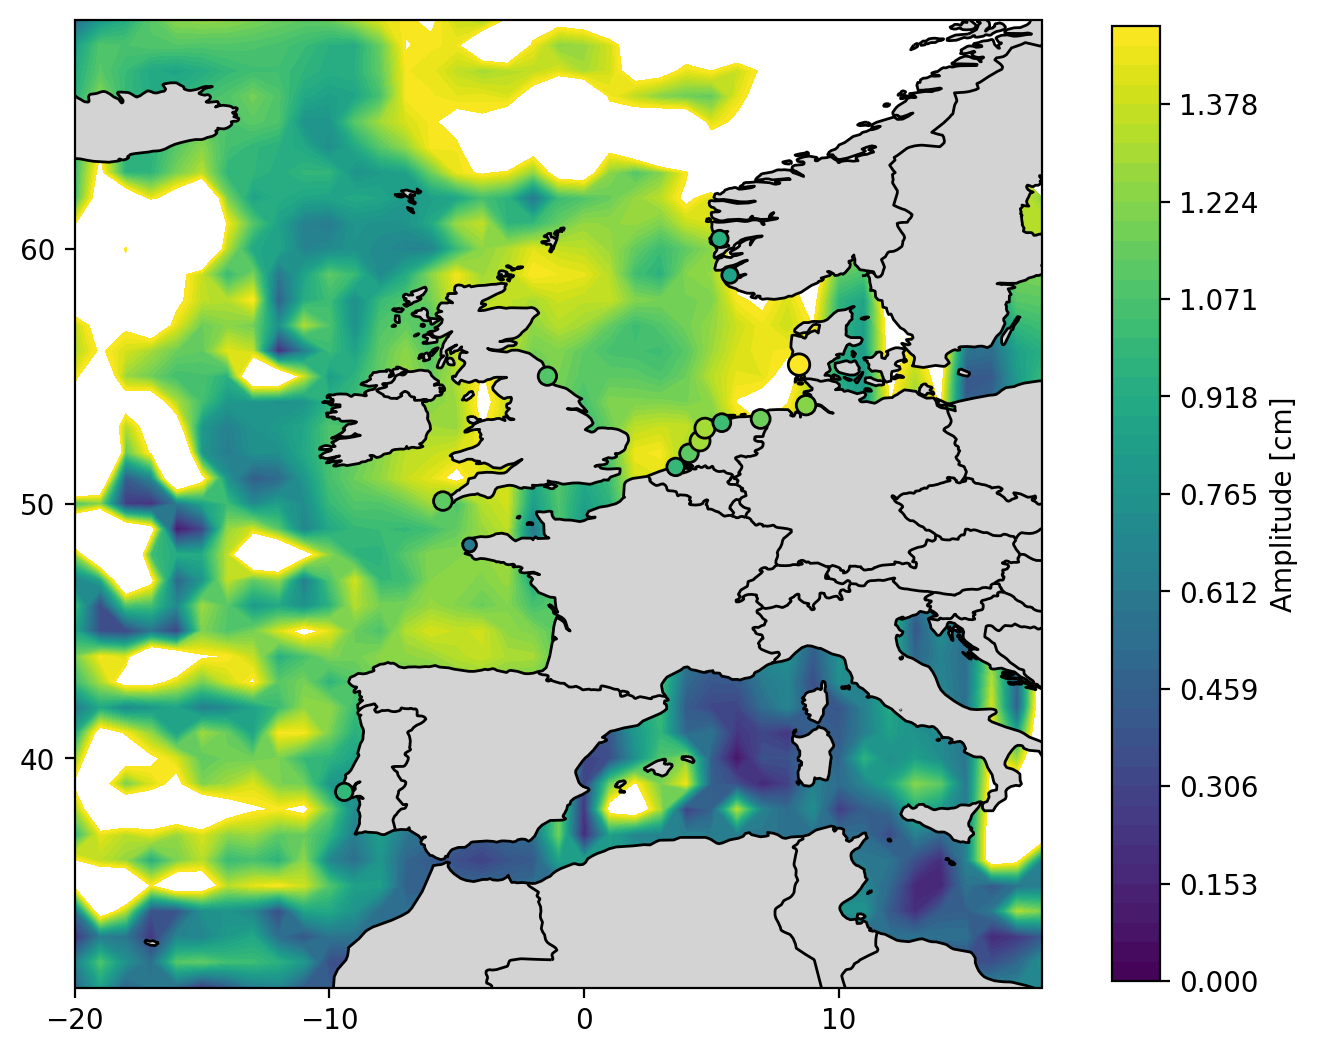

In [27]:
dampl = xr.DataArray(data=ampl,dims=["latitude", "longitude"],coords=dict(lon=(ds_out['longitude']),
            lat=(ds_out['latitude'])))

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection=ccrs.PlateCarree())

dampl2 = dampl.interpolate_na(dim='latitude')
dampl2 = dampl2.interpolate_na(dim='longitude')

levels = np.linspace(0,1.5)

tg = pd.read_csv('/Users/sbult/Desktop/Scripts/data/tide gauges/tidegauges_v13.csv',index_col=0)
tg_aoe = tg['dA (obs-eq)']

im = plt.contourf(lons[:-1], lats[:-1], dampl2, 60,transform=ccrs.PlateCarree(),vmin=0,vmax=1.5,levels=levels)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
plt.colorbar(im,fraction=0.044, pad=0.001,label='Amplitude [cm]')
#plt.clim([0,1.5])

lats2 = [38.683333,48.382850,50.103000,51.442222,51.977500,52.462222,52.964444,53.18,53.326389,53.866667,55.460833,55.007444,58.974339,60.398046]
lons2 = [-9.416667,-4.494838,-5.542833,3.596111,4.12000,4.554722,4.745000,5.409,6.933056,8.716667,8.441111,-1.439778,5.730121,5.320487]

ax.set_xticks([-20,-10,0,10], crs=ccrs.PlateCarree())
ax.set_yticks([30,40,50,60], crs=ccrs.PlateCarree())
ax.set_ylim([31,69])
ax.set_xlim([-20,18])

im.axes.add_feature(cfeature.LAND, facecolor='lightgrey', zorder=1)    
im.axes.add_feature(cfeature.BORDERS)
im.axes.coastlines();

s_ampl = tg_aoe

plt.scatter(lons2,lats2,transform=ccrs.PlateCarree(),s=s_ampl*40,c=s_ampl,vmin=0,vmax=1.5,edgecolors='k',zorder=2);
#plt.savefig('/Users/sbult/Desktop/Scripts/data/StericDataSterre/AltimetryAmplitudeAltimetry.png', dpi=150)

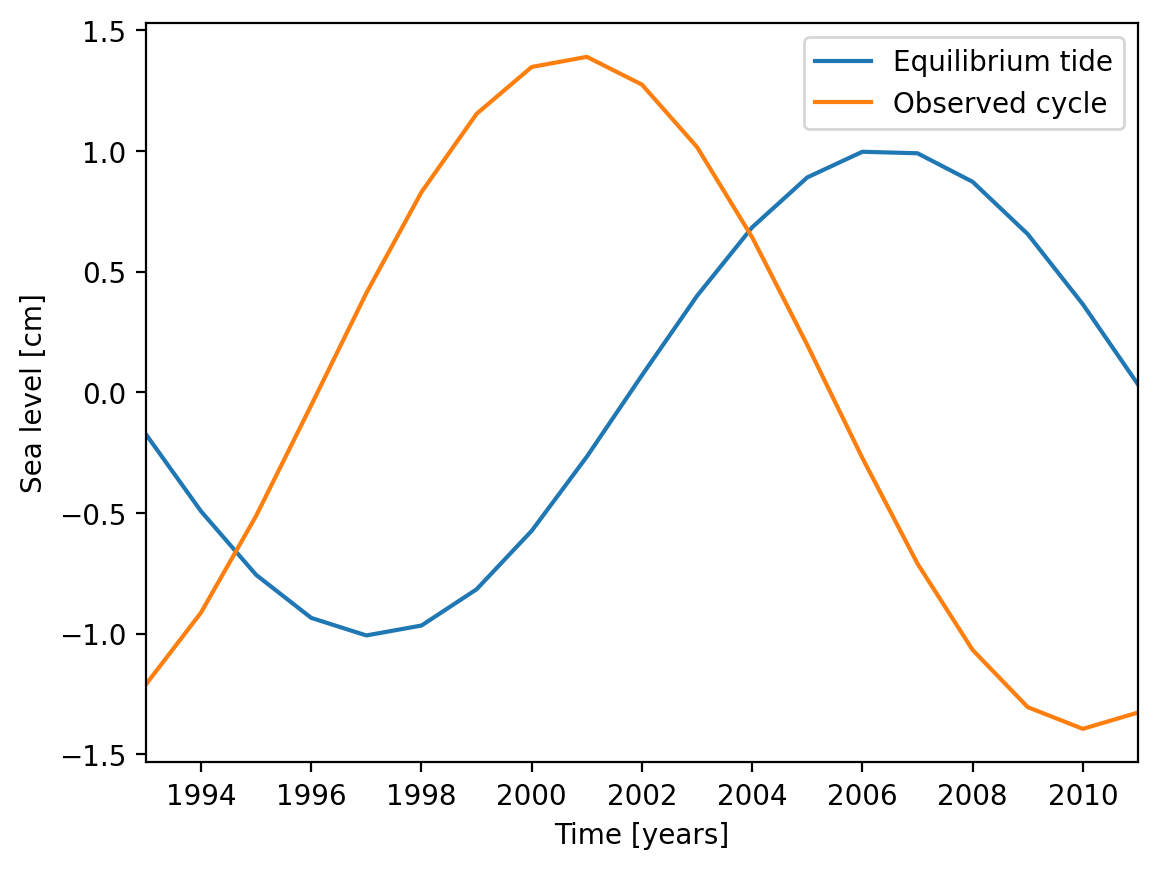

In [31]:
fig, ax = plt.subplots()

nodal_df[['Equilibrium tide','Observed cycle']].plot(ax=ax)
ax.set_xlim([1993,2011])
ax.set_xlabel("Time [years]")
ax.set_ylabel("Sea level [cm]");

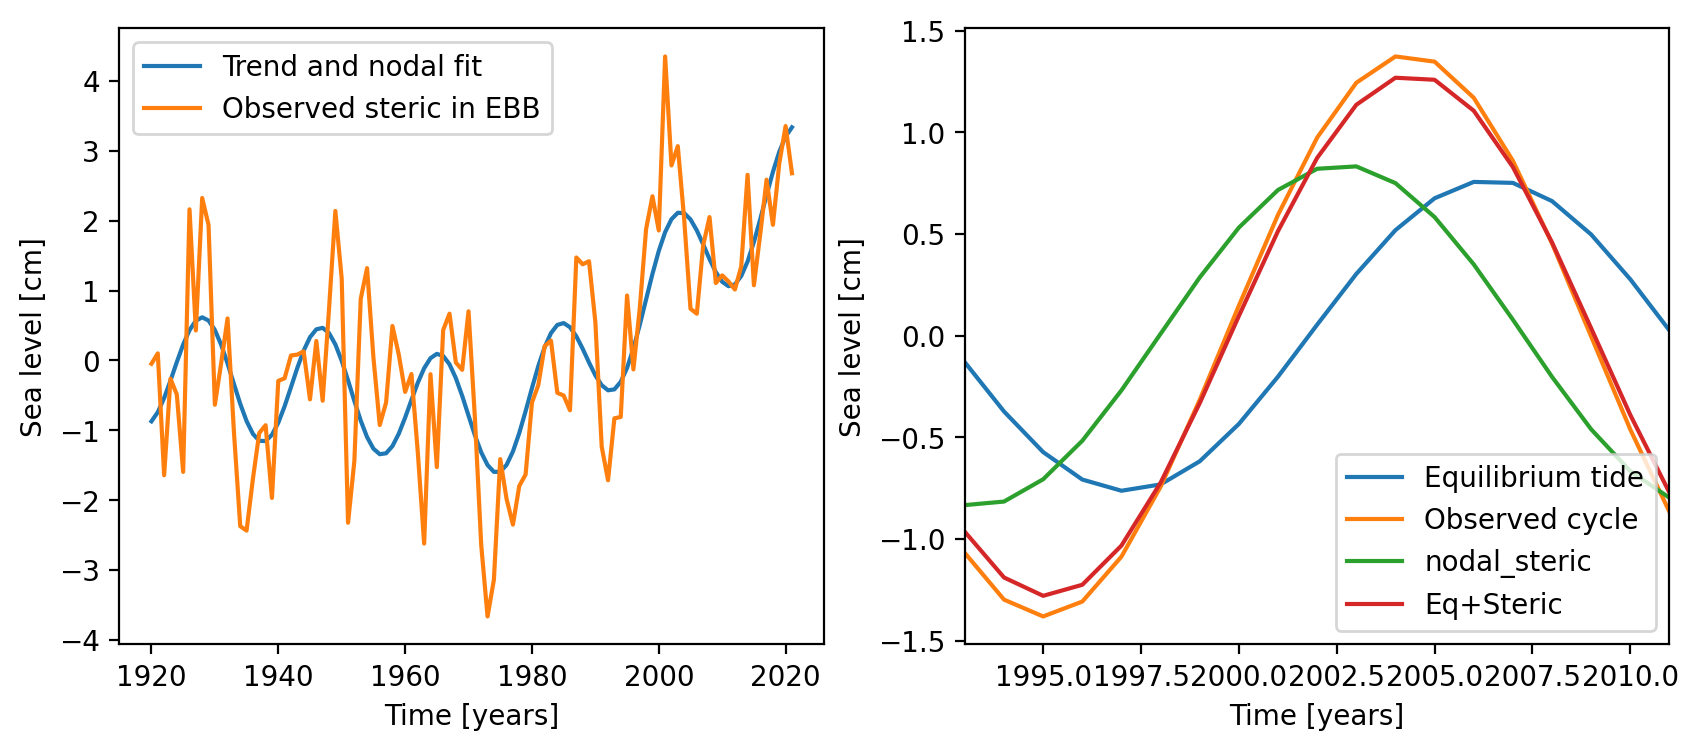

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))


ax[0].plot(res_nr["total"], label="Trend and nodal fit")
ax[0].plot(StericSL_df[f"Steric_{region}"], label=f"Observed steric in {region}" )

ax[0].legend()

nodal_df.plot(ax=ax[1])

ax[1].set_xlim([1993,2011])

for i in range(2):
    ax[i].set_xlabel("Time [years]")
    ax[i].set_ylabel("Sea level [cm]")

#plt.savefig('/Users/sbult/Desktop/Scripts/data/tide gauges/figures/NodalCycleNorthShields.pdf', dpi=150)

In [21]:
df_st = np.zeros((len(dr_out[1,:,1]),len(dr_out[1,1,:]),len(dr_out['year'])))
df_eqst = np.zeros((len(dr_out[1,:,1]),len(dr_out[1,1,:]),len(dr_out['year'])))
df_eq = np.zeros((len(dr_out[1,:,1]),len(dr_out[1,1,:]),len(dr_out['year'])))
df_obs = np.zeros((len(dr_out[1,:,1]),len(dr_out[1,1,:]),len(dr_out['year'])))
ampl = np.zeros((len(dr_out[1,:,1]),len(dr_out[1,1,:])))

for i in range(len(dr_out[1,:,1])):
    for j in range(len(dr_out[1,1,:])):
        pf = dr_out[:,i,j].to_dataframe()
        pf.replace(0,np.nan,inplace=True)
       
        t = dr_out['year']
        
        pf['nod1'] = np.cos(2*np.pi*(t - t[0])/18.613)
        pf['nod2'] = np.sin(2*np.pi*(t - t[0])/18.613)
        del pf['latitude']
        del pf['longitude']
        pf.columns = ['Steric','nod1','nod2']
        
        if pf['Steric'].isnull().any() == True:
            df_st[i,j,:] = np.nan
            df_eqst[i,j,:] = np.nan
            df_eq[i,j,:] = np.nan
            df_obs[i,j,:] = np.nan   
            ampl[i,j] = np.nan
        else:
            res_nr2, res_full_nr2 = compute_model(pf)
            res_nr2.columns = ['nod1','nod2','trend','total','obs']
        
            et = slc.nodal_tides_potential(int(lat[i]), pf.index)
            et = et.rename(columns={"Nodal":"Equilibrium tide"})
            
            res_nr = res_nr.loc[1993:2021]
    
            nodal_df = et.join([res_nr2["obs"],res_nr["nodal_steric"]])
            nodal_df["Eq+Steric"] = nodal_df["Equilibrium tide"] + nodal_df["nodal_steric"]
        
            df_st[i,j,:] = nodal_df["nodal_steric"]
            df_eqst[i,j,:] = nodal_df["Eq+Steric"]
            df_eq[i,j,:] = nodal_df["Equilibrium tide"]
            df_obs[i,j,:] = nodal_df["obs"]
            
            ampl[i,j] = nodal_df["obs"].loc[1993:2011].max()

TypeError: 'int' object is not subscriptable

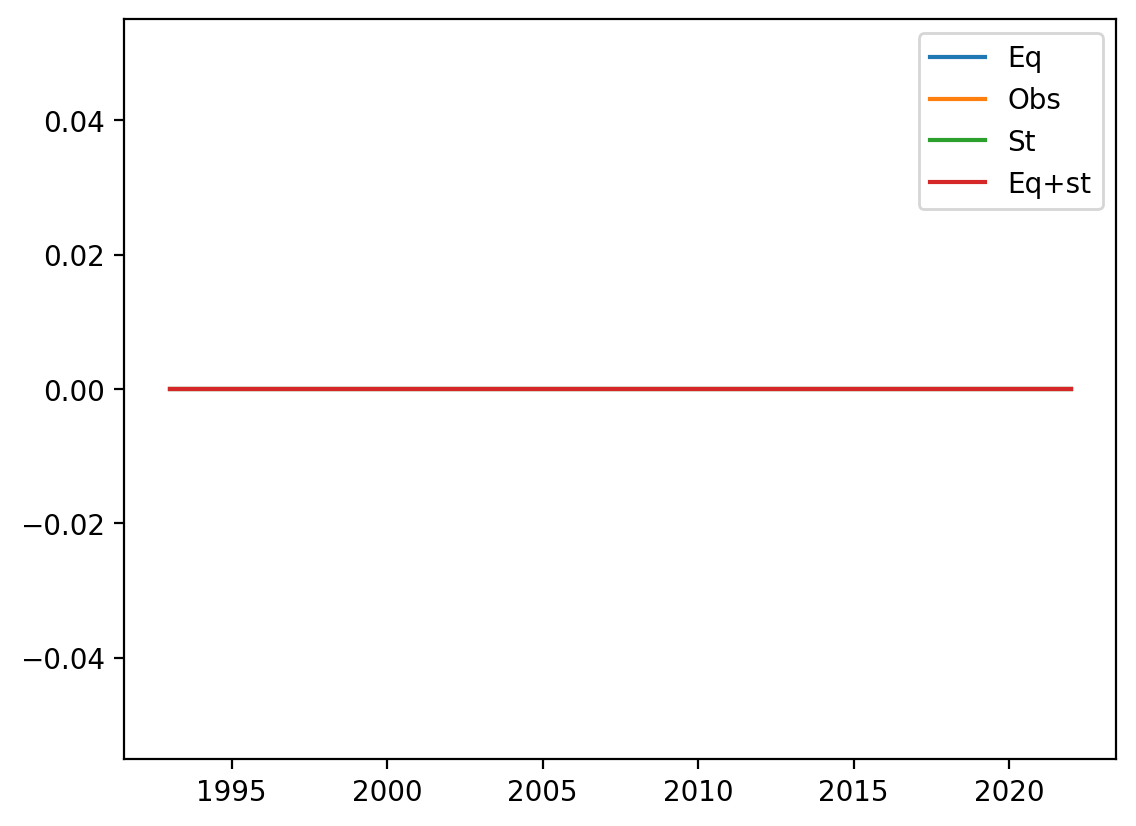

In [22]:
lats = 22
lons = 15

dampl = xr.DataArray(data=ampl,dims=["latitude", "longitude"],coords=dict(lon=(dr_out['longitude']),
            lat=(dr_out['latitude'])))

plt.plot(dr_out['year'],df_eq[lats,lons,:],label='Eq')
plt.plot(dr_out['year'],df_obs[lats,lons,:],label='Obs')
plt.plot(dr_out['year'],df_st[lats,lons,:],label='St')
plt.plot(dr_out['year'],df_eqst[lats,lons,:],label='Eq+st')

plt.legend();

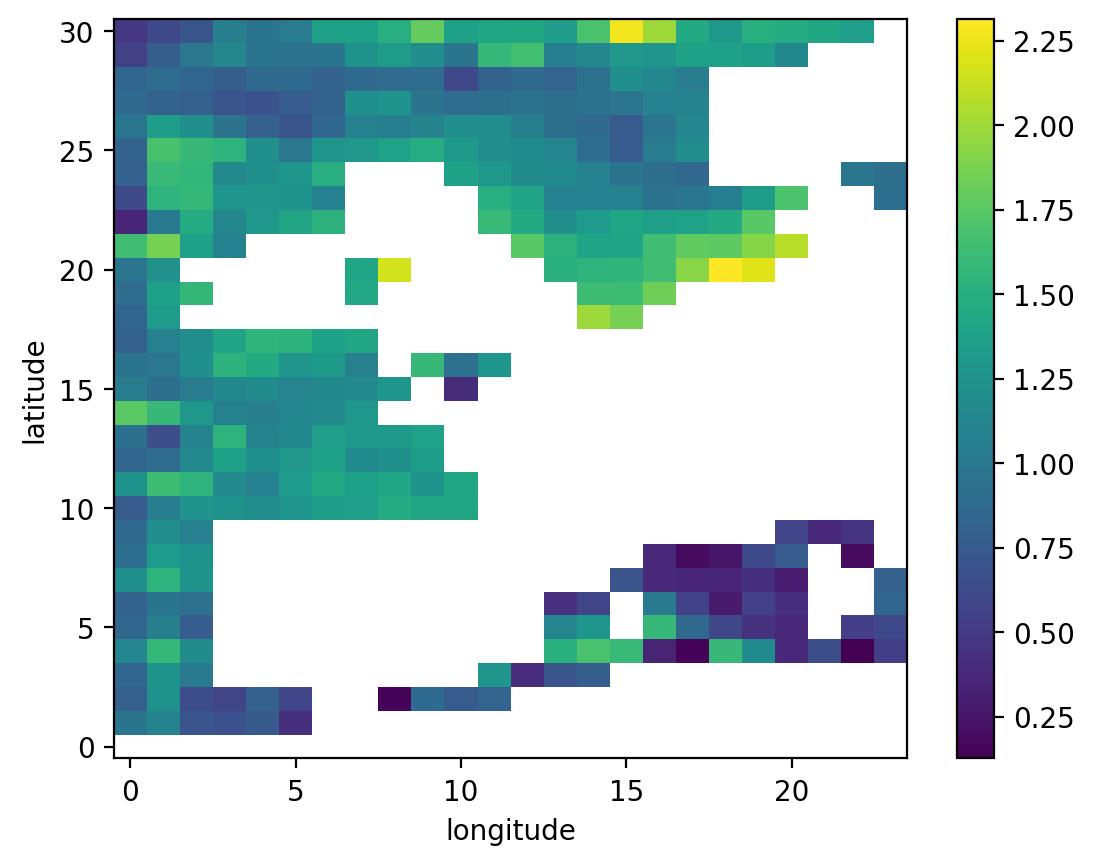

In [32]:
dampl.plot();

In [10]:
sla = dr_out.sel(latitude=55, longitude=3, method='nearest')
t = ds2['year']

pf = sla.to_dataframe()
pf['nod1'] = np.cos(2*np.pi*(t - t[0])/18.613)
pf['nod2'] = np.sin(2*np.pi*(t - t[0])/18.613)
del pf['latitude']
del pf['longitude']
pf.columns = ['Steric','nod1','nod2']

plt.plot(t,sla);
print(pf)

NameError: name 'dr_out' is not defined

In [14]:
gam_df = len(t)//2
gam_alpha = 5000

In [15]:
def gam_model(reg_df, regression_formula, summary=False):

    bs_ts = BSplines(reg_df.index, df=gam_df, degree=3) 
    # alpha is the penalization weight for smooth terms
    gam_bs_ts = GLMGam.from_formula(regression_formula, data=reg_df, smoother=bs_ts, alpha=gam_alpha)
    res_gam = gam_bs_ts.fit()

    if summary:
        print(res_gam.summary())
        
    return res_gam

def store_results_df(reg_df, res_gam, reg_list):

    # Store model results in a dataframe
    model_results_df = pd.DataFrame(index=reg_df.index)

    for proc in reg_list: 
        model_results_df[proc] = reg_df[proc]*res_gam.params[proc]

    model_results_df['trend'] = res_gam.partial_values(0, True)[0]
    model_results_df['total'] = model_results_df.sum(axis=1)

    if 'nod1' in res_gam.params.index:
        model_results_df['nodal_steric'] = model_results_df['nod1'] + model_results_df['nod2']

    return model_results_df

def compute_model(reg_df):
    
    reg_list = ['nod1', 'nod2']
    regression_formula = 'Steric ~ nod1 + nod2'
    res_gam = gam_model(reg_df, regression_formula, summary=False)
    model_results_df = store_results_df(reg_df, res_gam, reg_list)
    
    return model_results_df, res_gam

In [10]:
res_nr2, res_full_nr2 = compute_model(pf)

NameError: name 'pf' is not defined

In [12]:
res_nr2

,nod1,nod2,trend,total,nodal_steric
year,,,,,
1993,-1.170440,-0.000000,0.108505,-1.061935,-1.170440
1994,-1.104383,-0.083975,0.394423,-0.793935,-1.188358
1995,-0.913668,-0.158471,0.680480,-0.391659,-1.072139
1996,-0.619823,-0.215080,0.966819,0.131916,-0.834903
1997,-0.256016,-0.247411,1.253596,0.750169,-0.503427
1998,0.136690,-0.251816,1.540980,1.425854,-0.115126
1999,0.513967,-0.227797,1.829156,2.115326,0.286170
2000,0.833229,-0.178066,2.118374,2.773538,0.655164
2001,1.058441,-0.108235,2.408902,3.359108,0.950206


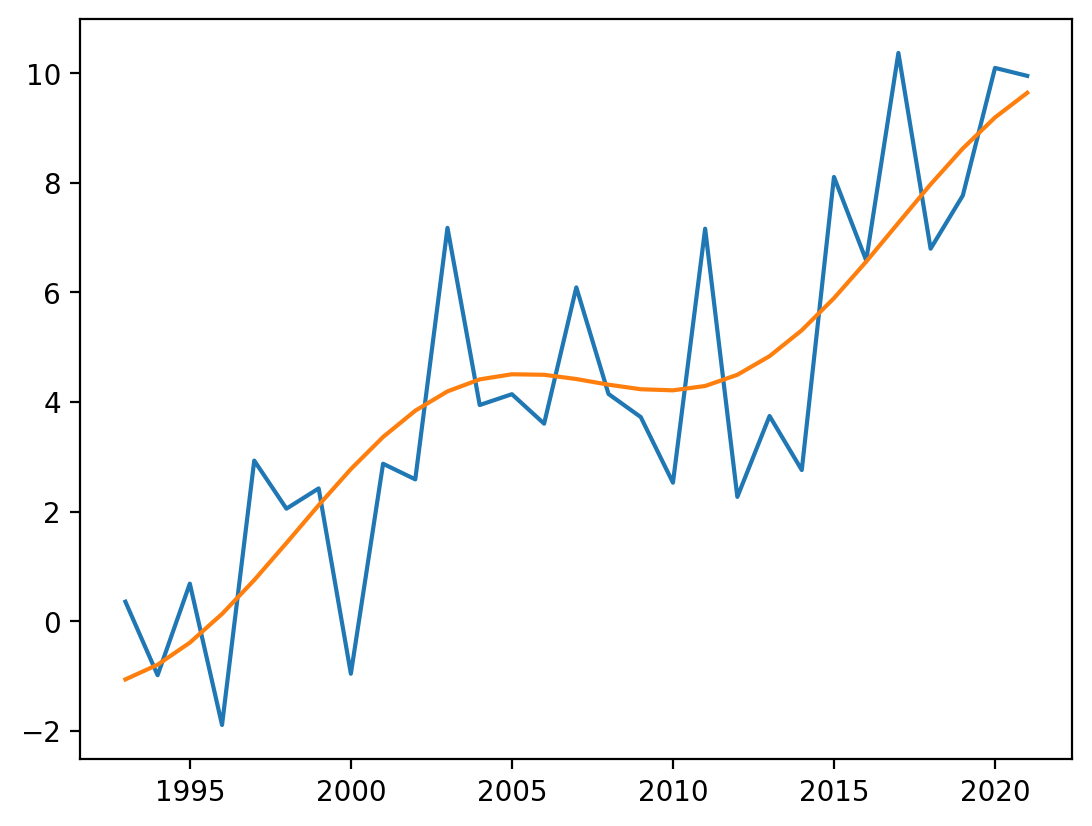

In [13]:
plt.plot(pf["Steric"]);
plt.plot(res_nr2["total"]);

In [5]:
latitude_netherlands = 53
latitude_brest = 48
latitude_newlyn = 50
latitude_stavanger = 59
latitude_denmark = 54
latitude_cascais = 39
latitude_ceuta = 36
latitude_esbjerg = 55
latitude_bergen = 60
latitude_northshields = 55
latitude_kungsholmsfort = 56
latitude_swinoujscie = 54

et = slc.nodal_tides_potential(latitude_netherlands, pf.index)
et = et.rename(columns={"Nodal":"Equilibrium tide"})

NameError: name 'pf' is not defined

In [11]:
max_depth = 400
region = "EBB"
start_year = 1960

In [12]:
StericSL_EBB_df = slc.StericSL('EN4_22', 'EBB', 0, max_depth, 0)
StericSL_BB_df = slc.StericSL('EN4_22', 'BB', 0, max_depth, 0)
StericSL_NWS_df = slc.StericSL('EN4_22', 'NWS', 0, max_depth, 0)
StericSL_ENS_df = slc.StericSL('EN4_22', 'ENS', 0, max_depth, 0)

StericSL_EBB_df.columns = ["Steric_EBB"]
StericSL_BB_df.columns = ["Steric_BB"]
StericSL_NWS_df.columns = ["Steric_NWS"]
StericSL_ENS_df.columns = ["Steric_ENS"]

StericSL_df = StericSL_EBB_df.join([StericSL_BB_df,StericSL_NWS_df,StericSL_ENS_df])

# Remove the first decades
StericSL_df = StericSL_df.loc[start_year:]

/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [13]:
t = StericSL_df.index

reg_df = pd.DataFrame({'Steric':StericSL_df[f"Steric_{region}"]})

reg_df['nod1'] = np.cos(2*np.pi*(t - t[0])/18.613)
reg_df['nod2'] = np.sin(2*np.pi*(t - t[0])/18.613)

In [16]:
res_nr, res_full_nr = compute_model(reg_df)

In [17]:
nodal_df = et.join([res_nr2["obs"],res_nr["nodal_steric"]])

nodal_df["Eq+Steric"] = nodal_df["Equilibrium tide"] + nodal_df["nodal_steric"]

NameError: name 'res_nr2' is not defined

In [ ]:
nodal_df.loc[1993:2022].plot();

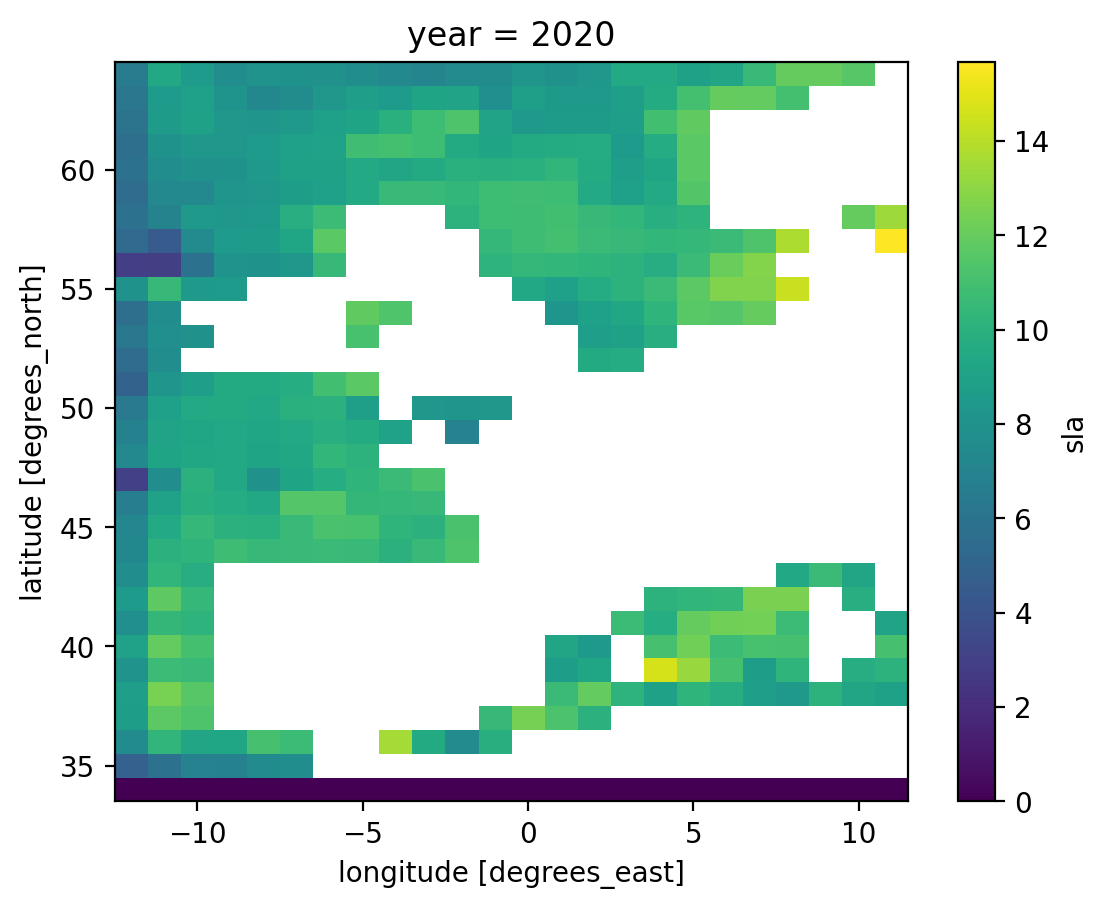

In [346]:
dr_out[27,:,:].plot();